In [1]:
from gensim.models import Word2Vec
w2v = Word2Vec.load("model.pkl")

In [27]:
import numpy as np

word = 'горшок'

similar = w2v.most_similar(positive=[word], topn=100)
for w, wt in similar[:10]:
    print(w, wt)
    
words = np.array([w for w, _ in similar])
word_vectors = np.array([w2v[w] for w in words])

горшочек 0.7105925679206848
кастрюля 0.657353401184082
глиняный 0.6550846099853516
ваза 0.6483527421951294
кувшин 0.6478919982910156
миска 0.6423501372337341
кадка 0.6408426761627197
корчага 0.6137997508049011
черепок 0.6068799495697021
таз 0.6067258715629578


In [28]:
import kmeans 
n_senses = 6
km = kmeans.KMeans(word_vectors, k=n_senses, metric='cosine')

kmeans: X (60, 300)  centres (6, 300)  delta=0.001  maxiter=10  metric=cosine
kmeans: 5 iterations  cluster sizes: [10 13  1 21  2 13]
kmeans: X (100, 300)  centres (6, 300)  delta=0.001  maxiter=10  metric=cosine
kmeans: 6 iterations  cluster sizes: [15 24  5 31  2 23]


array([False, False,  True,  True,  True, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False,  True,  True, False,  True,  True,
       False, False, False, False, False,  True, False,  True, False,
       False,  True, False, False, False,  True, False, False,  True,
       False, False,  True,  True, False, False, False, False, False,
       False, False,  True, False, False, False,  True, False, False,  True], dtype=bool)

In [30]:
for sense in range(n_senses):
    #sense_words = [w for w, _sense in zip(words, clf_res) if _sense == sense]
    sense_words = list(words[km.Xtocentre == sense])
    sense_words.sort(key=lambda w: w2v.vocab[w].count, reverse=True)
    print(sense, ' '.join(sense_words[:5]))

0 печь котел сковорода сковородка жаровня
1 корзина кувшин ваза глиняный тыква
2 цветочный клумба герань вазон кашпо
3 ложка тарелка миска поднос фарфоровый
4 посуда черепок
5 ведро раковина чайник кастрюля таз


In [19]:
from sklearn.cluster import KMeans

n_senses = 6
clf = KMeans(n_clusters=n_senses, random_state=42)
clf_res = clf.fit_predict(word_vectors)

from collections import Counter
Counter(clf_res)

Counter({0: 9, 1: 23, 2: 27, 3: 28, 4: 5, 5: 8})

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_res = pca.fit_transform(word_vectors)

print(pca_res[:2])

[[-0.08377539 -0.88522649]
 [-1.32236671  0.41424409]]


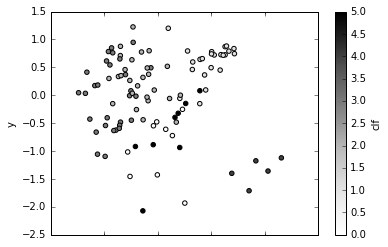

In [8]:
%matplotlib inline

import pandas as pd

df = pd.DataFrame.from_dict({
    "x": pca_res[:,0],
    "y": pca_res[:,1],
    "clf": clf_res,
})
df.plot.scatter(x="x", y="y", c="clf")